In [34]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# File to Load
state_and_county_variables_values = Path("/Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/Project1/FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_Data = Path("/Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/Project1/FoodEnvironmentAtlas/SupplementalDataCounty.csv")

# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()

georgia_county_filter = state_and_county_df['State']== 'GA'
GAcounties = state_and_county_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_Data_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df.head()
GAcounties.head()


,County,Variable_Code,Value
15864,Appling,LACCESS_POP10,3655.485669
15865,Appling,LACCESS_POP15,3671.279857
15866,Appling,PCH_LACCESS_POP_10_15,0.432068
15867,Appling,PCT_LACCESS_POP10,20.045436
15868,Appling,PCT_LACCESS_POP15,20.132046


In [35]:
#"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
#"Poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,POVRATE15,CNTY10,Percent

#Make a Clean DataFrame with Variables
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]
Lack_of_access15 = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_POP15")]

# Group by `County'
Poverty_Rate_15_Count = Poverty_Rate_15.groupby(["County"]).sum()["Value"]
Lack_of_access15_Count = Lack_of_access15.groupby(["County"]).sum()["Value"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
Poverty_vs_Lack_of_Access = pd.DataFrame({"Poverty Rate in 2015": Poverty_Rate_15_Count,
                                          "Population with low access to store, 2015": Lack_of_access15_Count}) 

# Display the DataFrame
Clean_Poverty_vs_Lack_of_Access = Poverty_vs_Lack_of_Access.dropna()
Clean_Poverty_vs_Lack_of_Access

,Poverty Rate in 2015,"Population with low access to store, 2015"
County,,
Appling,22.5,3671.279857
Atkinson,26.9,1919.599016
Bacon,23.9,1369.729366
Baker,28.7,2616.917116
Baldwin,26.0,7587.250750
...,...,...
Whitfield,15.3,23220.297310
Wilcox,30.4,72.807531
Wilkes,22.9,1963.798339


The r-squared is: 0.08049350372410145


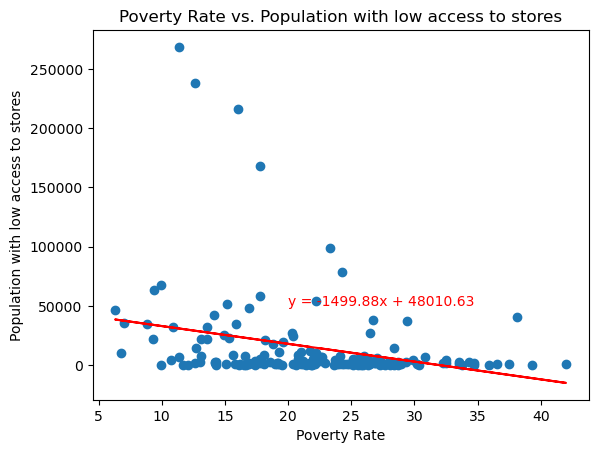

In [36]:
#Create a Scatter Plot to display the changes
x_values = Clean_Poverty_vs_Lack_of_Access['Poverty Rate in 2015']
y_values = Clean_Poverty_vs_Lack_of_Access['Population with low access to store, 2015']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50000),fontsize=10,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Population with low access to stores')
plt.title("Poverty Rate vs. Population with low access to stores")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [37]:
#"Low income & low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Household Resources,LACCESS_LOWI15,CNTY10,Count
#"Poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,POVRATE15,CNTY10,Percent

#Make a Clean DataFrame with Variables
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]
LowI_LowA = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_LOWI15")]

# Group by `County'
Poverty_Rate_15_Count = Poverty_Rate_15.groupby(["County"]).sum()["Value"]
LowI_LowA_Count = LowI_LowA.groupby(["County"]).sum()["Value"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
Poverty_vs_LowI_LowA = pd.DataFrame({"Poverty Rate in 2015": Poverty_Rate_15_Count,
                                     "Low income & low access to store, 2015": LowI_LowA_Count}) 

# Display the DataFrame
Clean_Poverty_vs_LowI_LowA = Poverty_vs_LowI_LowA.dropna()
Clean_Poverty_vs_LowI_LowA

,Poverty Rate in 2015,"Low income & low access to store, 2015"
County,,
Appling,22.5,1235.131823
Atkinson,26.9,1027.366526
Bacon,23.9,607.656003
Baker,28.7,1054.157546
Baldwin,26.0,4261.033191
...,...,...
Whitfield,15.3,10996.901100
Wilcox,30.4,40.386529
Wilkes,22.9,1214.731012


The r-squared is: 0.04869662549428723


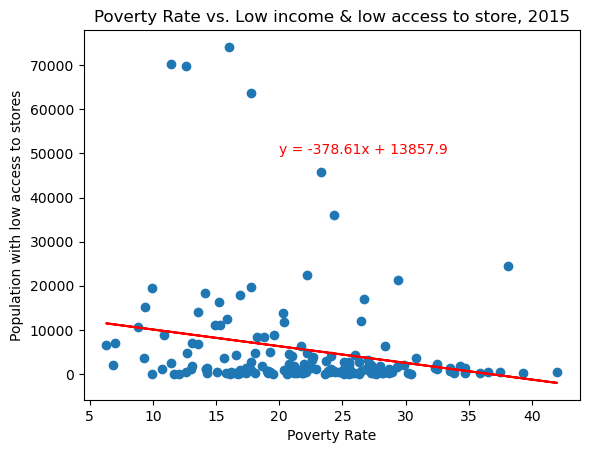

In [38]:
#Create a Scatter Plot to display the changes
x_values = Clean_Poverty_vs_LowI_LowA['Poverty Rate in 2015']
y_values = Clean_Poverty_vs_LowI_LowA['Low income & low access to store, 2015']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50000),fontsize=10,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Population with low access to stores')
plt.title("Poverty Rate vs. Low income & low access to store, 2015")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [39]:
#Calculate the Total Number of Counties
GAcounties_count = GAcounties["County"].nunique()
GAcounties_count

160

In [40]:
#Identify other characteristics of the top 5 Counties with positive change in food access via grocery stores
#"Poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,POVRATE15,CNTY10,Percent
Poverty_Rate_by_County_filter = GAcounties['Variable_Code']== 'POVRATE15' 
GAcounties_PR = GAcounties.loc[Poverty_Rate_by_County_filter, ['County', 'Value']]

Clean_GAcounties_PR = GAcounties_PR.dropna()
Clean_GAcounties_PR 

,County,Value
781069,Appling,22.5
781084,Atkinson,26.9
781099,Bacon,23.9
781114,Baker,28.7
781129,Baldwin,26.0
...,...,...
783379,Whitfield,15.3
783394,Wilcox,30.4
783409,Wilkes,22.9
783424,Wilkinson,20.9


In [41]:
#Finding the Mean, Median, Mode of Poverty Rate
GAPRMean =Clean_GAcounties_PR['Value'].mean()
GAPRMedian = Clean_GAcounties_PR['Value'].median()
GAPRMode = Clean_GAcounties_PR['Value'].mode()
print(GAPRMean, GAPRMedian, GAPRMode)

21.912578616352203 21.8 0    17.8
Name: Value, dtype: float64


In [42]:
#Find the number of Counties above and below the Mean
Above_Mean = Clean_GAcounties_PR[(Clean_GAcounties_PR['Value'] > GAPRMean)]
Above_Mean

,County,Value
781069,Appling,22.5
781084,Atkinson,26.9
781099,Bacon,23.9
781114,Baker,28.7
781129,Baldwin,26.0
...,...,...
783304,Washington,26.3
783334,Webster,23.6
783349,Wheeler,39.3
783394,Wilcox,30.4


In [43]:
Below_Mean = Clean_GAcounties_PR[(Clean_GAcounties_PR['Value'] < GAPRMean)]
Below_Mean

,County,Value
781144,Banks,15.8
781159,Barrow,15.6
781174,Bartow,13.6
781234,Bleckley,19.3
781249,Brantley,21.6
...,...,...
783319,Wayne,20.8
783364,White,15.2
783379,Whitfield,15.3
783424,Wilkinson,20.9


In [44]:
Georgia_Overview = pd.DataFrame({"Number of Counties": GAcounties_count,
                                 "Mean Poverty Rate": GAPRMean,
                                 "Number of Counties Below Mean Poverty Rate": (Below_Mean.count()),
                                 "Number of Counties Above Mean Poverty Rate": (Above_Mean.count())})
Georgia_Overview

,Number of Counties,Mean Poverty Rate,Number of Counties Below Mean Poverty Rate,Number of Counties Above Mean Poverty Rate
County,160,21.912579,81,78
Value,160,21.912579,81,78


In [45]:
#Filter to counties percent change of Grocery Stores from 2011 to 2016 in each county in GA
georgia_county__grocery_filter = GAcounties['Variable_Code']== 'PCH_GROCPTH_11_16' 
GAcounties_grocery = GAcounties.loc[georgia_county__grocery_filter, ['County', 'Value']]
GAcounties_grocery

,County,Value
142046,Appling,-0.086557
142082,Atkinson,-49.681490
142118,Bacon,-34.524124
142154,Baker,3.366584
142190,Baldwin,-36.424189
...,...,...
147516,Whitfield,7.380014
147552,Wilcox,-100.000000
147588,Wilkes,-21.884545
147624,Wilkinson,56.001326


In [46]:
#Find the counties with the highest positive percent change
Positive_Change_Grocery = GAcounties_grocery[(GAcounties_grocery["Value"] > 0)]
highest_grocery_growth =Positive_Change_Grocery.sort_values(by=['Value'], ascending=False).head(5)
highest_grocery_growth.head()

,County,Value
143934,Evans,208.942632
145504,Marion,207.084949
145324,Lumpkin,190.265795
144500,Hancock,117.072889
142752,Candler,105.368759


In [47]:
#Find the counties with the highest negative percent change
Negative_Change_Grocery = GAcounties_grocery[(GAcounties_grocery["Value"] < 0)]
lowest_grocery_growth =Negative_Change_Grocery.sort_values(by=['Value'], ascending=True).head(5)
lowest_grocery_growth.head()


,County,Value
143648,Dooly,-100.000000
143396,Crawford,-100.000000
147552,Wilcox,-100.000000
145716,Morgan,-75.300756
146070,Pike,-66.932619


In [48]:
#Comparing the percent change of Grocery Stores to Convenience Stores in Georgia
# Use the code provided to separate the data by grade
Grocery_Store = GAcounties[(GAcounties["Variable_Code"] == "PCH_GROCPTH_11_16")]
Convenience_Store = GAcounties[(GAcounties["Variable_Code"] == "PCH_CONVS_11_16")]

# Group by `school_name` and take the mean of the `math_score` column for each.
#Reference for numeric_oly use from: https://stackoverflow.com/questions/44522741/pandas-typeerror-could-not-convert-to-numeric
Grocery_Store_Change = Grocery_Store.groupby(["County"]).sum()["Value"]
Convenience_Store_Change = Convenience_Store.groupby(["County"]).sum()["Value"]


# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
County_Change_in_Access = pd.DataFrame({"Grocery Stores" : Grocery_Store_Change,
                                        "Convenience Stores" : Convenience_Store_Change})

# Minor data wrangling
County_Change_in_Access = County_Change_in_Access[["Grocery Stores", "Convenience Stores"]]
County_Change_in_Access.index.name = "County"

# Display the DataFrame
County_Change_in_Access_Clean = County_Change_in_Access.dropna()
County_Change_in_Access_Clean

,Grocery Stores,Convenience Stores
County,,
Appling,-0.086557,7.692308
Atkinson,-49.681490,0.000000
Bacon,-34.524124,33.333333
Baker,3.366584,-100.000000
Baldwin,-36.424189,-5.128205
...,...,...
Whitfield,7.380014,0.000000
Wilcox,-100.000000,0.000000
Wilkes,-21.884545,60.000000


The r-squared is: 0.029058939687760257


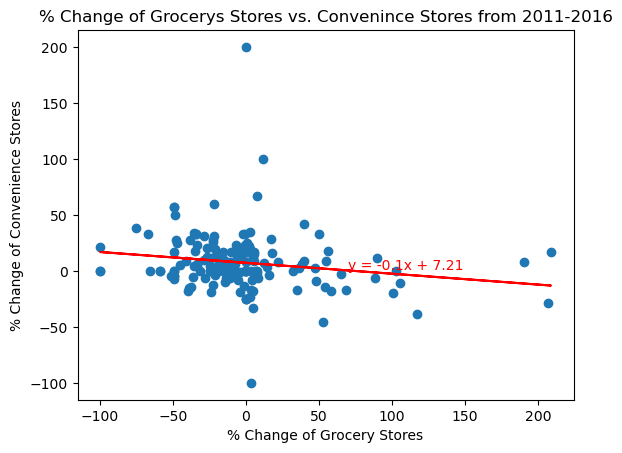

In [49]:
#Create a Scatter Plot to display the changes
x_values = County_Change_in_Access_Clean['Grocery Stores']
y_values = County_Change_in_Access_Clean['Convenience Stores']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,1),fontsize=10,color="red")
plt.xlabel('% Change of Grocery Stores')
plt.ylabel('% Change of Convenience Stores')
plt.title("% Change of Grocerys Stores vs. Convenince Stores from 2011-2016")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [50]:
#Show the overall Change in Grocery Stores and Concenience Stores in Georgia
Average_Change_df = County_Change_in_Access.sum()/len(County_Change_in_Access)
Average_Change_df

Grocery Stores       -2.313472
Convenience Stores    7.495848
dtype: float64

In [51]:
#Comparing the percent change of Grocery Stores to Fast-Food Restaurants in Georgia
#"Fast-food restaurants, 2016",Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,FFR16,CNTY10,Count
#"Grocery stores, 2016",Store Availability,STORES,Grocery,GROC16,CNTY10,Count

# Use the code provided to separate the data by grade
Grocery_Store = GAcounties[(GAcounties["Variable_Code"] == "GROC16")]
Fast_Food = GAcounties[(GAcounties["Variable_Code"] == "FFR16")]

# Group by `school_name` and take the mean of the `math_score` column for each.
#Reference for numeric_oly use from: https://stackoverflow.com/questions/44522741/pandas-typeerror-could-not-convert-to-numeric
Grocery_Store_Count = Grocery_Store.groupby(["County"]).sum()["Value"]
Fast_Food_Count = Fast_Food.groupby(["County"]).sum()["Value"]


# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
Grocery_vs_Fast_Food = pd.DataFrame({"Grocery Stores" : Grocery_Store_Count,
                                        "Fast Food Restaurants" : Fast_Food_Count})

# Minor data wrangling
Grocery_vs_Fast_Food = Grocery_vs_Fast_Food[["Grocery Stores", "Fast Food Restaurants"]]
Grocery_vs_Fast_Food.index.name = "County"

# Display the DataFrame
County_Grocery_vs_Fast_Food = Grocery_vs_Fast_Food.dropna()
County_Grocery_vs_Fast_Food

,Grocery Stores,Fast Food Restaurants
County,,
Appling,2.0,15.0
Atkinson,2.0,5.0
Bacon,2.0,7.0
Baker,1.0,0.0
Baldwin,7.0,41.0
...,...,...
Whitfield,24.0,80.0
Wilcox,0.0,1.0
Wilkes,3.0,5.0


The r-squared is: 0.9650249219928835


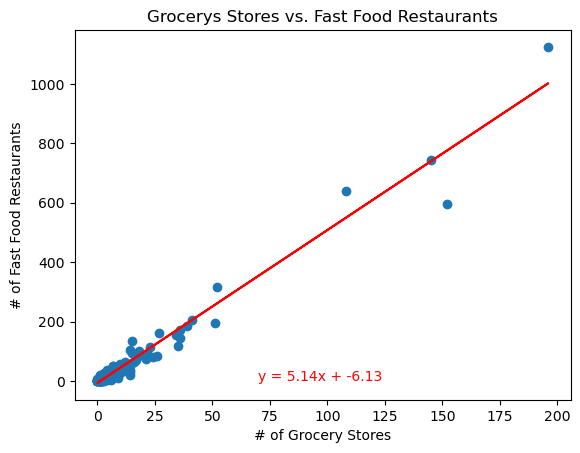

In [52]:
#Create a Scatter Plot to display the changes
x_values = County_Grocery_vs_Fast_Food['Grocery Stores']
y_values = County_Grocery_vs_Fast_Food['Fast Food Restaurants']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,1),fontsize=10,color="red")
plt.xlabel('# of Grocery Stores')
plt.ylabel('# of Fast Food Restaurants')
plt.title("Grocerys Stores vs. Fast Food Restaurants")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [53]:
#Comparing the percent change of Grocery Stores to Fast-Food Restaurants in Georgia
#"Fast-food restaurants, 2016",Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,FFR16,CNTY10,Count
#"Grocery stores, 2016",Store Availability,STORES,Grocery,GROC16,CNTY10,Count

# Use the code provided to separate the data by grade
Grocery_Store = GAcounties[(GAcounties["Variable_Code"] == "GROC16")]
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]
Fast_Food = GAcounties[(GAcounties["Variable_Code"] == "FFR16")]

# Group by `school_name` and take the mean of the `math_score` column for each.
#Reference for numeric_oly use from: https://stackoverflow.com/questions/44522741/pandas-typeerror-could-not-convert-to-numeric
Grocery_Store_Count = Grocery_Store.groupby(["County"]).sum()["Value"]
Fast_Food_Count = Fast_Food.groupby(["County"]).sum()["Value"]
Poverty_Rate_15_Count = Poverty_Rate_15.groupby(["County"]).sum()["Value"]


# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
GrocFFPV = pd.DataFrame({"Grocery Stores" : Grocery_Store_Count,
                                     "Fast Food Restaurants" : Fast_Food_Count,
                                     "Poverty Rate": Poverty_Rate_15_Count})

# Minor data wrangling
GrocFFPV = GrocFFPV [["Grocery Stores", "Fast Food Restaurants", "Poverty Rate" ]]
GrocFFPV .index.name = "County"

# Display the DataFrame
Clean_GrocFFPV = GrocFFPV .dropna()
Clean_GrocFFPV

,Grocery Stores,Fast Food Restaurants,Poverty Rate
County,,,
Appling,2.0,15.0,22.5
Atkinson,2.0,5.0,26.9
Bacon,2.0,7.0,23.9
Baker,1.0,0.0,28.7
Baldwin,7.0,41.0,26.0
...,...,...,...
Whitfield,24.0,80.0,15.3
Wilcox,0.0,1.0,30.4
Wilkes,3.0,5.0,22.9


The r-squared is: 0.058692393465501425


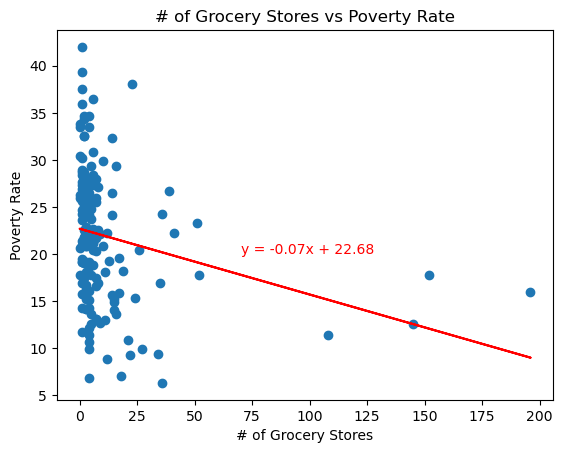

In [54]:
#Create a Scatter Plot to display the changes
x_values = Clean_GrocFFPV['Grocery Stores']
y_values = Clean_GrocFFPV['Poverty Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,20),fontsize=10,color="red")
plt.xlabel('# of Grocery Stores')
plt.ylabel('Poverty Rate')
plt.title("# of Grocery Stores vs Poverty Rate")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.061311032982623165


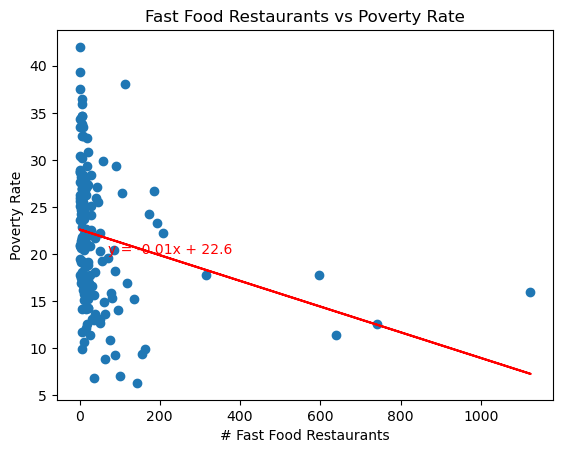

In [55]:
#Create a Scatter Plot to display the changes
x_values = Clean_GrocFFPV['Fast Food Restaurants']
y_values = Clean_GrocFFPV['Poverty Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,20),fontsize=10,color="red")
plt.xlabel('# Fast Food Restaurants')
plt.ylabel('Poverty Rate')
plt.title("Fast Food Restaurants vs Poverty Rate")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [56]:

# #Comparing the % Change of Recreational & Fitness Facilities from 2011-2016 to the Adult Obesity Rate in 2017
# Children, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,LACCESS_CHILD15,CNTY10,Count
# "Black, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,LACCESS_BLACK15,CNTY10,Count
# "White, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,LACCESS_WHITE15,CNTY10,Count
# "Hispanic ethnicity, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,LACCESS_HISP15,CNTY10,Count
# "% White, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,PCT_NHWHITE10,CNTY10,Percent
# "% Black, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,PCT_NHBLACK10,CNTY10,Percent
# "% Hispanic, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,PCT_HISP10,CNTY10,Percent
# "% Asian, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,PCT_NHASIAN10,CNTY10,Percent
#"Asian, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,LACCESS_NHASIAN15,CNTY10,Count
#"Seniors, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,LACCESS_SENIORS15,CNTY10,Count
# "% Population under age 18, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,PCT_18YOUNGER10,CNTY10,Percent

#Create variables for DataFrame
White_LAS = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_WHITE15")]
White_POP = GAcounties[(GAcounties["Variable_Code"] == "PCT_NHWHITE10")]
Black_LAS = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_BLACK15")]
Black_POP = GAcounties[(GAcounties["Variable_Code"] == "PCT_NHBLACK10")]
Hispanic_LAS = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_HISP15")]
Hispanic_POP = GAcounties[(GAcounties["Variable_Code"] == "PCT_HISP10")]
Asian_LAS = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_NHASIAN15")]
Asian_POP = GAcounties[(GAcounties["Variable_Code"] == "PCT_NHASIAN10")]
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]


# Group by `County'
White_LAS_Count = White_LAS.groupby(["County"]).sum()["Value"]
Black_LAS_Count = Black_LAS.groupby(["County"]).sum()["Value"]
Hispanic_LAS_Count = Hispanic_LAS.groupby(["County"]).sum()["Value"]
Asian_LAS_Count = Asian_LAS.groupby(["County"]).sum()["Value"]
White_POP_Count = White_POP.groupby(["County"]).sum()["Value"]
Black_POP_Count = Black_POP.groupby(["County"]).sum()["Value"]
Hispanic_POP_Count = Hispanic_POP.groupby(["County"]).sum()["Value"]
Asian_POP_Count = Asian_POP.groupby(["County"]).sum()["Value"]
Total_POP_Count = White_LAS_Count + Black_LAS_Count + Hispanic_LAS_Count + Asian_LAS_Count
Poverty_Rate_15_Count = Poverty_Rate_15.groupby(["County"]).sum()["Value"]


# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
DemographicLA = pd.DataFrame({"White Low Food Access": White_LAS_Count,
                              "Black Low Food Access" : Black_LAS_Count,
                              "Hispanic Low Food Access": Hispanic_LAS_Count,
                              "Asian Low Food Access": Asian_LAS_Count,
                              "Total Population": Total_POP_Count,
                              "Poverty Rate": Poverty_Rate_15_Count})

# Display the DataFrame
Clean_DemographicLA = DemographicLA.dropna()
Clean_DemographicLA


,White Low Food Access,Black Low Food Access,Hispanic Low Food Access,Asian Low Food Access,Total Population,Poverty Rate
County,,,,,,
Appling,3067.598131,341.005735,298.502103,45.445204,3752.551173,22.5
Atkinson,1066.506806,531.675679,375.844908,4.000000,1978.027393,26.9
Bacon,935.691008,315.942347,115.484454,5.602307,1372.720116,23.9
Baker,1320.631541,1182.055420,90.824896,18.891025,2612.402882,28.7
Baldwin,3476.568780,3821.604875,103.002650,115.560896,7516.737201,26.0
...,...,...,...,...,...,...
Whitfield,17341.750340,823.534628,8059.792204,347.482745,26572.559917,15.3
Wilcox,55.964615,15.848070,0.871081,0.935811,73.619578,30.4
Wilkes,1008.049865,871.012791,83.195711,2.526391,1964.784758,22.9


The r-squared is: 0.120693899575489


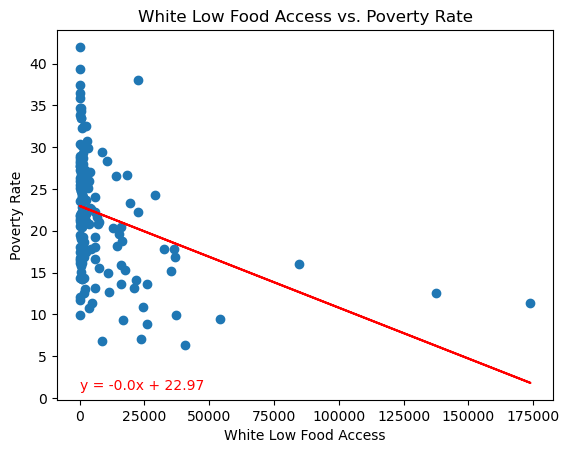

In [57]:
#Create a Scatter Plot to display the changes
x_values = Clean_DemographicLA['White Low Food Access']
y_values = Clean_DemographicLA['Poverty Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,1),fontsize=10,color="red")
plt.xlabel('White Low Food Access')
plt.ylabel('Poverty Rate')
plt.title("White Low Food Access vs. Poverty Rate")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7393142455395504


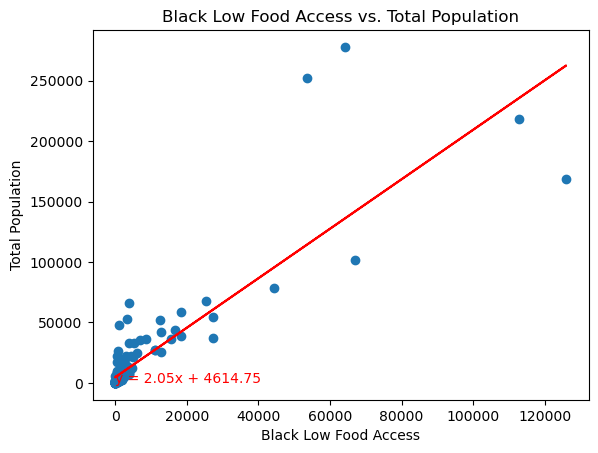

In [58]:
#Create a Scatter Plot to display the changes
x_values = Clean_DemographicLA['Black Low Food Access']
y_values = Clean_DemographicLA['Total Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,1),fontsize=10,color="red")
plt.xlabel('Black Low Food Access')
plt.ylabel('Total Population')
plt.title("Black Low Food Access vs. Total Population")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [59]:
#Children Food Access DataFrame
# "Students eligible for free lunch (%), 2015",Food Assistance,ASSISTANCE,National School Lunch Program,PCT_FREE_LUNCH15,CNTY10,Percent
# "Children, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,PCT_LACCESS_CHILD15,CNTY10,Percent
# "Child poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,CHILDPOVRATE15,CNTY10,Percent


#Collect Variables for DataFrame - Vulnerable Age Groups
Students_FL = GAcounties[(GAcounties["Variable_Code"] == "PCT_FREE_LUNCH15")]
Children_LAS = GAcounties[(GAcounties["Variable_Code"] == "PCT_LACCESS_CHILD15")]
ChildPOVRate = GAcounties[(GAcounties["Variable_Code"] == "CHILDPOVRATE15")]

# #Group by County
Students_FL_Count = Students_FL.groupby(["County"]).sum()["Value"]
ChildPOVRate_Count = ChildPOVRate.groupby(["County"]).sum()["Value"]

#Identifying vulnerable age groups with low access to food
Children_DF = pd.DataFrame({"Students Eligble for Free Lunch": Students_FL_Count,
                            "Child Poverty Rate": ChildPOVRate_Count})
Clean_Children_DF = Children_DF.dropna()


The r-squared is: 0.7820735650721438


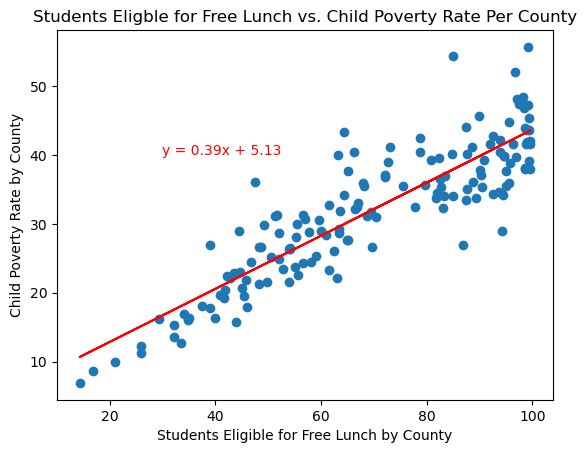

In [60]:
# Create a scatter plot which compares Child Poverty Rate to Students Eligible for Free Lunch
x_values = Clean_Children_DF['Students Eligble for Free Lunch']
y_values = Clean_Children_DF['Child Poverty Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=10,color="red")
plt.xlabel('Students Eligible for Free Lunch by County')
plt.ylabel('Child Poverty Rate by County')
plt.title("Students Eligble for Free Lunch vs. Child Poverty Rate Per County")
print(f"The r-squared is: {rvalue**2}")

In [61]:
# "SNAP redemptions/SNAP-authorized stores (% change), 2012-17",Food Assistance,ASSISTANCE,SNAP,PCH_REDEMP_SNAPS_12_17,CNTY10,% change
# "Grocery stores (% change), 2011-16",Store Availability,STORES,Grocery,PCH_GROC_11_16,CNTY10,% change
#Snap Usage vs. Grocery Stores
#Collect Variables for DataFrame - Vulnerable Age Groups
SNAP_Redemption = GAcounties[(GAcounties["Variable_Code"] == "PCH_REDEMP_SNAPS_12_17")]
Grocery_Stores = GAcounties[(GAcounties["Variable_Code"] == "PCH_GROC_11_16")]


# #Group by County
SNAP_Redemption_Count = SNAP_Redemption.groupby(["County"]).sum()["Value"]
Grocery_Stores_Count = Grocery_Stores.groupby(["County"]).sum()["Value"]

#Identifying vulnerable age groups with low access to food
SNAP_vs_Grocery = pd.DataFrame({"SNAP Redemption (% Change)": SNAP_Redemption_Count,
                            "Grocery Stores (% Change)": Grocery_Stores_Count})
Clean_SNAP_vs_Grocery = SNAP_vs_Grocery.dropna()
Clean_SNAP_vs_Grocery


,SNAP Redemption (% Change),Grocery Stores (% Change)
County,,
Appling,-6.135913,0.000000
Atkinson,-37.149492,-50.000000
Bacon,2.363636,-33.333333
Baldwin,-8.984641,-36.363636
Banks,-26.908979,0.000000
...,...,...
Whitfield,-31.709821,9.090909
Wilcox,-8.294664,-100.000000
Wilkes,-30.288464,-25.000000


The r-squared is: 0.00011252420907354282


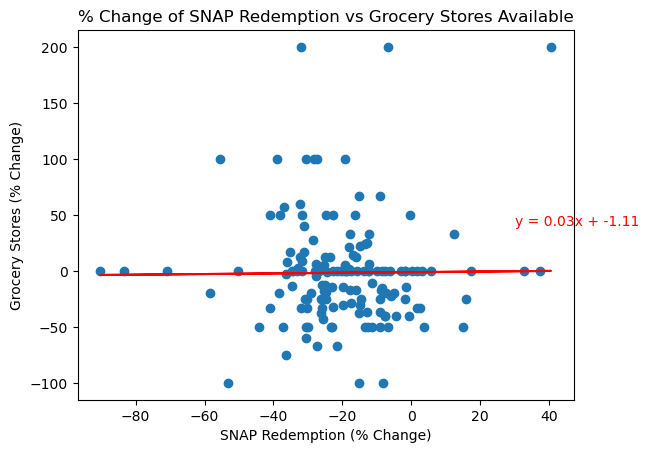

In [62]:
# Create a scatter plot which compares Change in Grocery Stores vs SNAP Redemption
x_values = Clean_SNAP_vs_Grocery['SNAP Redemption (% Change)']
y_values = Clean_SNAP_vs_Grocery['Grocery Stores (% Change)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=10,color="red")
plt.xlabel('SNAP Redemption (% Change)')
plt.ylabel('Grocery Stores (% Change)')
plt.title("% Change of SNAP Redemption vs Grocery Stores Available")
print(f"The r-squared is: {rvalue**2}")